# KNN Classification : Breast Cancer
https://docs.google.com/document/d/1CwwMb0IfgWhOcWYvIjsKBvd0P0I80XsSOoKEL6zTm_I/edit

* **1. Réaliser l'analyse exploratoire des données**
* **2. Visualiser les données**
* **3. Déclarer le vecteur de caractéristiques et la variable cible**
* **4. Divisez les données en un ensemble d'entraînement et de test séparé**
* **5. Feature engineering (Ingénierie des fonctionnalités) :**
processus de transformation des données brutes en fonctionnalités utiles qui nous aident à mieux comprendre notre modèle et à augmenter sa puissance prédictive : tips : utiliser .isnull().sum()
Nous supposons que des données sont manquantes aléatoirement. Deux méthodes peuvent être utilisées pour imputer les valeurs manquantes. L'une est l'imputation moyenne ou médiane et l'autre est l'imputation par échantillon aléatoire. Lorsqu'il y a des valeurs aberrantes dans l'ensemble de données, nous devrions utiliser l'imputation médiane. Vous pouvez donc utiliser des mécanismes d'imputation médiane parce que l'imputation médiane est robuste aux valeurs aberrantes.L'imputation doit être effectuée sur l'ensemble d'apprentissage, puis propagée vers l'ensemble de test. Cela signifie que les mesures statistiques à utiliser pour remplir les valeurs manquantes à la fois dans le train et dans l'ensemble d'essai doivent être extraites de l'ensemble de train uniquement. Ceci pour éviter le surajustement.
* **6. Feature scaling**
* **7. Ajuster le classificateur à l'ensemble d'entraînement**
* **8. Prédire les résultats du test (predict() et predict_proba())**
* **9. Vérifiez le score de précision :**
Comparez la précision du modèle avec une précision nulle. La précision du modèle sur ce jeu de données devrait être très élevée. Mais, nous ne pouvons pas dire que notre modèle est très bon basé seulement sur cette prédiction. Nous devons le comparer avec la précision nulle. La précision nulle est la précision qui pourrait être obtenue en prédisant toujours la classe la plus fréquente. Vous devez donc vérifier la distribution des classes dans l'ensemble de test.
* **10. Reconstruire le modèle de classification kNN en utilisant différentes valeurs de k**
(vous pouvez par exemple  augmenter la valeur de k et voir son effet sur la précision)
* **11. Matrice de confusion.**
La matrice de confusion vous donnera une image claire de la performance du modèle de classification et des types d'erreurs produites par le modèle. Elle affiche un résumé des prévisions correctes et incorrectes ventilées par catégorie.**
* **12. Métriques de classification.** 
rapport de classification : affiche les scores de précision, de rappel, de f1 et de support du modèle.
Nous pouvons classer les observations par probabilité de cancer bénin ou malin.
Prédisez les probabilités. Pour cela, choisissez la classe avec la probabilité la plus élevée
Niveau de seuil de classification : Il existe un seuil de classification de 0,5.
Classe 4 - la probabilité de cancer malin est prédite si la probabilité est> 0,5.
Classe 2 - la probabilité de cancer bénin est prévue si la probabilité <0,5.
* **13. ROC - AUC.** 
ROC Curve est un autre outil permettant de mesurer visuellement les performances du modèle de classification. ROC Curve est l'acronyme de Receiver Operating Characteristic Curve. Une courbe ROC est un graphique qui montre les performances d'un modèle de classification à différents niveaux de seuil de classification.La courbe ROC trace le taux de vrais positifs (TPR) par rapport au taux de faux positifs (FPR) à différents niveaux de seuil. Le taux vrai positif (TPR) est également appelé rappel. Il est défini comme le rapport de TP à (TP + FN). Le taux de faux positifs (FPR) est défini comme le rapport entre FP et (FP + TN).
ROC AUC signifie Receiver Operating Characteristic - Area Under Curve. C'est une technique pour comparer les performances du classificateur. Dans cette technique, nous mesurons l'aire sous la courbe (AUC). Un classificateur parfait aura une AUC ROC égale à 1, tandis qu'un classificateur purement aléatoire aura une AUC ROC égale à 0,5.
Ainsi, ROC AUC est le pourcentage du tracé ROC qui se trouve sous la courbe.
* **14. Utiliser la validation croisée K-Fold :**
Il s’agit d’une technique de validation croisée pour améliorer les performances du modèle. La validation croisée est une méthode statistique d'évaluation des performances de généralisation. Elle est plus stable et plus approfondie que l'utilisation d'un fractionnement train-test pour évaluer les performances du modèle.
* **15. Résultats et conclusion**
* **16. Bonus : Implémenter votre propre algorithme KNN.**
Vous pouvez vous appuyer sur cet algorithme :
Proposition non optimisée de l’algorithme kNN
    * 1. Charger les données
    * 2. Initialiser k au nombre de plus proches voisins choisi
    * 3. Pour chaque exemple dans les données:
        * 3.1 Calculer la distance entre notre requête et l’observation itérative actuelle de la boucle depuis les            données.
        * 3.2 Ajouter la distance et l’indice de l’observation concernée à une collection ordonnée de données
    * 4. Trier cette collection ordonnée contenant distances et indices de la plus petite distance à la plus grande (dans ordre croissant).
    * 5. Sélectionner les k premières entrées de la collection de données triées (équivalent aux k plus proches voisins
    * 6. Obtenir les étiquettes des k entrées sélectionnées
        * 6.1 Si régression, retourner la moyenne des k étiquettes
        * 6.2 Si classification, retourner le mode (valeur la plus fréquente/commune) des k étiquettes
* **17. Bonus 2 : Comparer les résultats avec un autre algorithme de classification**




## 1. Réaliser l'analyse exploratoire des données

In [1]:
import pandas as pd

data =  pd.read_csv('Breast_Cancer.csv')

In [2]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# Estimation des dimensions 
data.shape

(569, 33)

In [4]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
# Analyse des valeurs null
data.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [6]:
data = data.drop(['Unnamed: 32'],axis=1)
data.shape

(569, 32)

In [7]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
data.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

## 2. Visualiser les données 

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'radius_mean'}>,
        <AxesSubplot:title={'center':'texture_mean'}>,
        <AxesSubplot:title={'center':'perimeter_mean'}>,
        <AxesSubplot:title={'center':'area_mean'}>,
        <AxesSubplot:title={'center':'smoothness_mean'}>],
       [<AxesSubplot:title={'center':'compactness_mean'}>,
        <AxesSubplot:title={'center':'concavity_mean'}>,
        <AxesSubplot:title={'center':'concave points_mean'}>,
        <AxesSubplot:title={'center':'symmetry_mean'}>,
        <AxesSubplot:title={'center':'fractal_dimension_mean'}>,
        <AxesSubplot:title={'center':'radius_se'}>],
       [<AxesSubplot:title={'center':'texture_se'}>,
        <AxesSubplot:title={'center':'perimeter_se'}>,
        <AxesSubplot:title={'center':'area_se'}>,
        <AxesSubplot:title={'center':'smoothness_se'}>,
        <AxesSubplot:title={'center':'compactness_se'}>,
        <AxesSubplot:title={'center':'concavity_se'}>],

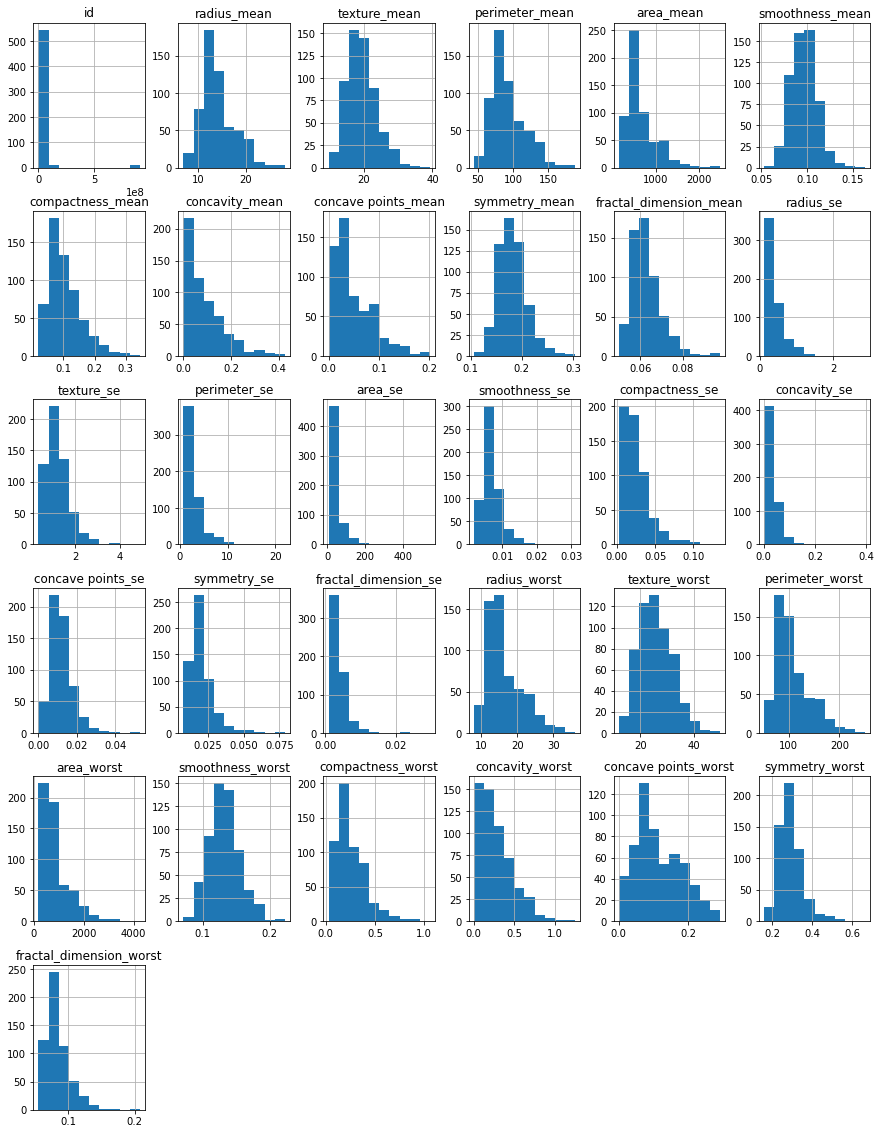

In [9]:
data.hist(figsize=(15,20))

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

#data1 = data[['diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean',
              #'smoothness_mean','compactness_mean','concavity_mean','concave points_mean']]

#sns.pairplot(data1)

# Le pairplot n'a pas été ploté car trop de mémoire requise

## 3. Déclarer le vecteur de caractéristiques et la variable cible

In [10]:
data['diagnosis'].replace(['M','B'],[1,0], inplace=True)

In [11]:
y = data['diagnosis']
X = data.drop(['diagnosis','id'], axis=1)

## 4. Feature Engineering : Analyse des données manquantes / Data Preprocesing - LabelEncoder ?
processus de transformation des données brutes en fonctionnalités utiles qui nous aident à mieux comprendre notre modèle et à augmenter sa puissance prédictive : tips : utiliser .isnull().sum()
Nous supposons que des données sont manquantes aléatoirement. Deux méthodes peuvent être utilisées pour imputer les valeurs manquantes. L'une est l'imputation moyenne ou médiane et l'autre est l'imputation par échantillon aléatoire. Lorsqu'il y a des valeurs aberrantes dans l'ensemble de données, nous devrions utiliser l'imputation médiane. Vous pouvez donc utiliser des mécanismes d'imputation médiane parce que l'imputation médiane est robuste aux valeurs aberrantes.L'imputation doit être effectuée sur l'ensemble d'apprentissage, puis propagée vers l'ensemble de test. Cela signifie que les mesures statistiques à utiliser pour remplir les valeurs manquantes à la fois dans le train et dans l'ensemble d'essai doivent être extraites de l'ensemble de train uniquement. Ceci pour éviter le surajustement.

In [12]:
pd.isnull(data).sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## 5. Feature Scaling 

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
X_minmax = MinMaxScaler().fit_transform(X)
X_minmax

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

## 6.Divisez les données en un ensemble d'entraînement et de test séparé


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_minmax, y, test_size=0.2, random_state=42)

print('Train set: ',X_train.shape)
print('Test set: ',X_test.shape)

Train set:  (455, 30)
Test set:  (114, 30)


## 7. Ajuster le classificateur à l'ensemble d'entraînement


In [18]:
from sklearn.neighbors import KNeighborsClassifier

# Les voisins sont fixés à 5 de base 
model = KNeighborsClassifier()
                 
model.fit(X_train,y_train)


KNeighborsClassifier()

## 8. Prédire les résultats du test (predict() et predict_proba())


In [30]:
y_pred = model.predict(X_train)
y_pred.shape

(455,)

In [22]:
y_pred_proba = model.predict_proba(X_train)
y_pred_proba

array([[1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.2, 0.8],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [1. ,

## 9. Vérifiez le score de précision :

In [23]:
print('Train score: ', model.score(X_train,y_train))
print('Test score: ', model.score(X_test,y_test))

Train score:  0.978021978021978
Test score:  0.9649122807017544


In [24]:
from sklearn.metrics import precision_score

y_true = data.diagnosis

print('Precision score micro :',precision_score(y_train, y_pred, average='micro',zero_division=1))
print('Precision score macro :',precision_score(y_train, y_pred, average='macro', zero_division=1))
print('Precision score weighted :',precision_score(y_train, y_pred, average='weighted', zero_division=1))


Precision score micro : 0.978021978021978
Precision score macro : 0.9831081081081081
Precision score weighted : 0.9787644787644788


## 10. Reconstruire le modèle de classification kNN en utilisant différentes valeurs de k (vous pouvez par exemple  augmenter la valeur de k et voir son effet sur la précision)


/home/helloworld/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass param_name=n_neighbors, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


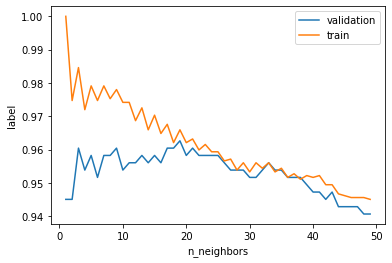

In [25]:
#Validation Curve 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve

k = np.arange(1,50)

train_score, val_score = validation_curve(model,X_train,y_train,'n_neighbors', k)

val_score.mean(axis=1)

plt.plot(k, val_score.mean(axis=1), label='validation')
plt.plot(k, train_score.mean(axis=1), label='train')

plt.ylabel('label')
plt.xlabel('n_neighbors')
plt.legend()




## 11. Matrice de confusion. 
La matrice de confusion vous donnera une image claire de la performance du modèle de classification et des types d'erreurs produites par le modèle. Elle affiche un résumé des prévisions correctes et incorrectes ventilées par catégorie.


In [31]:
y_test.shape

(114,)

In [40]:
y_pred.shape

(455,)

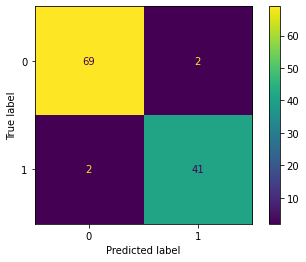

In [32]:
from sklearn.metrics import plot_confusion_matrix

confusion_matrix(y_test, model.predict(X_test))

plot_confusion_matrix(model, X_test, y_test)  
plt.show()  


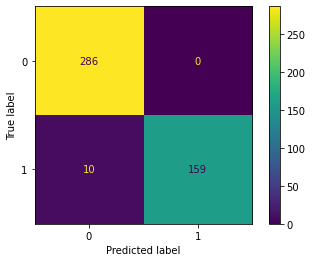

In [37]:

plot_confusion_matrix(model, X_train, y_train)  
plt.show()  

In [15]:
#ça veut dire que dans 94% des cas, notre modèle effectue une bonne prédiction

In [33]:
# Cross Validation (pour améliorer le model)
#Découper le train set avec la technique de cross validation avec différentes modules comme KFold, StratifieldKFold
#et le ShuffleSplit

from sklearn.model_selection import cross_val_score

cross_val_score(KNeighborsClassifier(19),X_train,y_train,scoring='accuracy').mean()



0.9626373626373625

In [34]:
#Validation Curve 
import numpy as np
from sklearn.model_selection import validation_curve

k = np.arange(1,50)

train_score, val_score = validation_curve(model,X_train,y_train,'n_neighbors', k)

val_score.mean(axis=1)

/home/helloworld/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass param_name=n_neighbors, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


array([0.94505495, 0.94505495, 0.96043956, 0.95384615, 0.95824176,
       0.95164835, 0.95824176, 0.95824176, 0.96043956, 0.95384615,
       0.95604396, 0.95604396, 0.95824176, 0.95604396, 0.95824176,
       0.95604396, 0.96043956, 0.96043956, 0.96263736, 0.95824176,
       0.96043956, 0.95824176, 0.95824176, 0.95824176, 0.95824176,
       0.95604396, 0.95384615, 0.95384615, 0.95384615, 0.95164835,
       0.95164835, 0.95384615, 0.95604396, 0.95384615, 0.95384615,
       0.95164835, 0.95164835, 0.95164835, 0.94945055, 0.94725275,
       0.94725275, 0.94505495, 0.94725275, 0.94285714, 0.94285714,
       0.94285714, 0.94285714, 0.94065934, 0.94065934])

Nous avons un pb d'overfiting jus'a 9 voisins


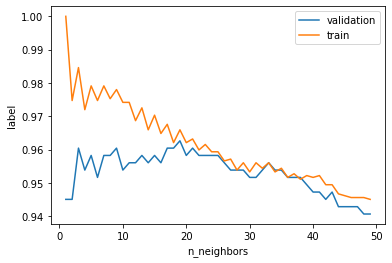

In [35]:
plt.plot(k, val_score.mean(axis=1), label='validation')
plt.plot(k, train_score.mean(axis=1), label='train')

plt.ylabel('label')
plt.xlabel('n_neighbors')
plt.legend()
print("Nous avons un pb d'overfiting jus'a 9 voisins")

GridSearchCV nous permet de construire une grille de modèles avec toutes les combinaisons d'hyperparamètres présent dans param_grid

In [36]:
from sklearn.model_selection import GridSearchCV
import numpy as np


In [37]:
param_grid = {'n_neighbors': np.arange(1,20)}

grid = GridSearchCV(KNeighborsClassifier(), param_grid)

In [38]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [39]:
grid.best_params_

{'n_neighbors': 19}

In [40]:
grid.best_score_

0.9626373626373625

In [41]:
grid.best_estimator_


KNeighborsClassifier(n_neighbors=19)

In [43]:
model.score(X_test,y_test)

0.9649122807017544

In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
confusion_matrix(y_test, model.predict(X_test))

array([[69,  2],
       [ 2, 41]])

## 12. Métriques de classification. rapport de classification : affiche les scores de précision, de rappel, de f1 et de support du modèle
Nous pouvons classer les observations par probabilité de cancer bénin ou malin.
Prédisez les probabilités. Pour cela, choisissez la classe avec la probabilité la plus élevée
Niveau de seuil de classification : Il existe un seuil de classification de 0,5.
Classe 4 - la probabilité de cancer malin est prédite si la probabilité est> 0,5.
Classe 2 - la probabilité de cancer bénin est prévue si la probabilité <0,5.


In [46]:
from sklearn.metrics import precision_recall_fscore_support

print('Precision/Recall/Fscore/Support :',precision_recall_fscore_support(y_train, y_pred, average='macro'))
print('Precision/Recall/Fscore/Support :',precision_recall_fscore_support(y_train, y_pred, average='micro'))
print('Precision/Recall/Fscore/Support :',precision_recall_fscore_support(y_train, y_pred, average='weighted'))



Precision/Recall/Fscore/Support : (0.9831081081081081, 0.970414201183432, 0.9761650322688794, None)
Precision/Recall/Fscore/Support : (0.978021978021978, 0.978021978021978, 0.978021978021978, None)
Precision/Recall/Fscore/Support : (0.9787644787644788, 0.978021978021978, 0.9778757618209466, None)


## 14. Utiliser la validation croisée K-Fold :
Il s’agit d’une technique de validation croisée pour améliorer les performances du modèle. La validation croisée est une méthode statistique d'évaluation des performances de généralisation. Elle est plus stable et plus approfondie que l'utilisation d'un fractionnement train-test pour évaluer les performances du modèle.


In [48]:
from sklearn.model_selection import KFold

In [49]:
kf = KFold(n_splits=2)

kf.get_n_splits(X)

2

In [55]:
kf = KFold(n_splits=2)

for train, test in kf.split(X):
    print("%s %s" % (train, test))

[285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302
 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320
 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338
 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356
 357 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374
 375 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392
 393 394 395 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410
 411 412 413 414 415 416 417 418 419 420 421 422 423 424 425 426 427 428
 429 430 431 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446
 447 448 449 450 451 452 453 454 455 456 457 458 459 460 461 462 463 464
 465 466 467 468 469 470 471 472 473 474 475 476 477 478 479 480 481 482
 483 484 485 486 487 488 489 490 491 492 493 494 495 496 497 498 499 500
 501 502 503 504 505 506 507 508 509 510 511 512 513 514 515 516 517 518
 519 520 521 522 523 524 525 526 527 528 529 530 53